In [1]:
import ccxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def crypto_metric_ranking(market, timeframe, days, top_n, metrics, plot=False):
    # Imposta l'exchange da ccxt
    exchange = getattr(ccxt, market)()
    exchange.load_markets()

    # Trova tutti i pair in USDT
    usdt_pairs = [symbol for symbol in exchange.symbols if symbol.endswith('/USDT')]

    end_timestamp = int(pd.Timestamp.now().timestamp() * 1000)
    start_timestamp = end_timestamp - (days * 24 * 60 * 60 * 1000)  # Calcola il timestamp di L giorni fa

    metrics_data = {metric: [] for metric in metrics}
    
    for pair in usdt_pairs:
        print(f"Scarico i dati per {pair} degli ultimi {days} giorni...")
        
        ohlcv = []
        since = start_timestamp

        # Scarica i dati in blocchi fino a raggiungere la data di fine
        while since < end_timestamp:
            try:
                batch = exchange.fetch_ohlcv(pair, timeframe, since)
                if not batch:
                    break
                ohlcv.extend(batch)
                since = batch[-1][0] + 1  # Avanza al prossimo blocco
                time.sleep(exchange.rateLimit / 1000)  # Rispetta il rate limit dell'API
            except Exception as e:
                print(f"Errore durante il download dei dati per {pair}: {e}")
                break

        # Se non ci sono dati, continua con la prossima crypto
        if not ohlcv:
            continue

        # Crea un DataFrame dai dati
        df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)

        # Calcola le metriche specificate
        for metric in metrics:
            try:
                metric_value = eval(metric)
                metrics_data[metric].append((pair, metric_value))
            except Exception as e:
                print(f"Errore durante il calcolo della metrica per {pair}: {e}")
                continue

    # Ordina e mostra i risultati per ogni metrica
    for metric in metrics:
        print(f"\nClassifica per la metrica {metric}")
        sorted_metric = sorted(metrics_data[metric], key=lambda x: x[1], reverse=True)

        # Seleziona le prime N crypto per la metrica
        top_crypto = sorted_metric[:top_n]

        # Stampa la classifica delle prime N crypto
        print(f"Classifica delle top {top_n} crypto per {metric}:")
        for i, (pair, value) in enumerate(top_crypto, start=1):
            print(f"{i}. {pair}: Valore = {value:.4f}")

        # Seleziona le ultime N crypto per la metrica
        bottom_crypto = sorted_metric[-top_n:]

        # Stampa la classifica delle ultime N crypto
        print(f"\nClassifica delle bottom {top_n} crypto per {metric}:")
        for i, (pair, value) in enumerate(bottom_crypto, start=1):
            print(f"{i}. {pair}: Valore = {value:.4f}")

        # Se plot=True, mostra il grafico dei prezzi delle prime 3 e delle ultime 3 crypto per la metrica
        if plot:
            print(f'\nGrafici delle prime 3 crypto per la metrica {metric}')
            for i, (pair, _) in enumerate(top_crypto[:3]):
                try:
                    df = pd.DataFrame(exchange.fetch_ohlcv(pair, timeframe, start_timestamp), columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
                    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
                    df.set_index('timestamp', inplace=True)

                    plt.figure(figsize=(10, 6))
                    plt.plot(df.index, df['close'], label=f"{pair} Price")
                    plt.title(f"Prezzi di {pair} negli ultimi {days} giorni per {metric}")
                    plt.xlabel("Data")
                    plt.ylabel("Prezzo (USDT)")
                    plt.legend()
                    plt.grid()
                    plt.tight_layout()
                    plt.show()
                except Exception as e:
                    print(f"Errore durante il plot per {pair}: {e}")
                    continue

            print(f'\nGrafici delle ultime 3 crypto per la metrica {metric}')
            for i, (pair, _) in enumerate(bottom_crypto[:3]):
                try:
                    df = pd.DataFrame(exchange.fetch_ohlcv(pair, timeframe, start_timestamp), columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
                    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
                    df.set_index('timestamp', inplace=True)

                    plt.figure(figsize=(10, 6))
                    plt.plot(df.index, df['close'], label=f"{pair} Price")
                    plt.title(f"Prezzi di {pair} negli ultimi {days} giorni per {metric}")
                    plt.xlabel("Data")
                    plt.ylabel("Prezzo (USDT)")
                    plt.legend()
                    plt.grid()
                    plt.tight_layout()
                    plt.show()
                except Exception as e:
                    print(f"Errore durante il plot per {pair}: {e}")
                    continue

Scarico i dati per 1INCH/USDT degli ultimi 30 giorni...
Scarico i dati per 1SOL/USDT degli ultimi 30 giorni...
Scarico i dati per 3P/USDT degli ultimi 30 giorni...
Scarico i dati per 5IRE/USDT degli ultimi 30 giorni...
Scarico i dati per A8/USDT degli ultimi 30 giorni...
Scarico i dati per AARK/USDT degli ultimi 30 giorni...
Scarico i dati per AAVE/USDT degli ultimi 30 giorni...
Scarico i dati per ACA/USDT degli ultimi 30 giorni...
Scarico i dati per ACH/USDT degli ultimi 30 giorni...
Scarico i dati per ACS/USDT degli ultimi 30 giorni...
Scarico i dati per ADA/USDT degli ultimi 30 giorni...
Scarico i dati per AEG/USDT degli ultimi 30 giorni...
Scarico i dati per AERO/USDT degli ultimi 30 giorni...
Scarico i dati per AEVO/USDT degli ultimi 30 giorni...
Scarico i dati per AFC/USDT degli ultimi 30 giorni...
Scarico i dati per AFG/USDT degli ultimi 30 giorni...
Scarico i dati per AGI/USDT degli ultimi 30 giorni...
Scarico i dati per AGLA/USDT degli ultimi 30 giorni...
Scarico i dati per AG

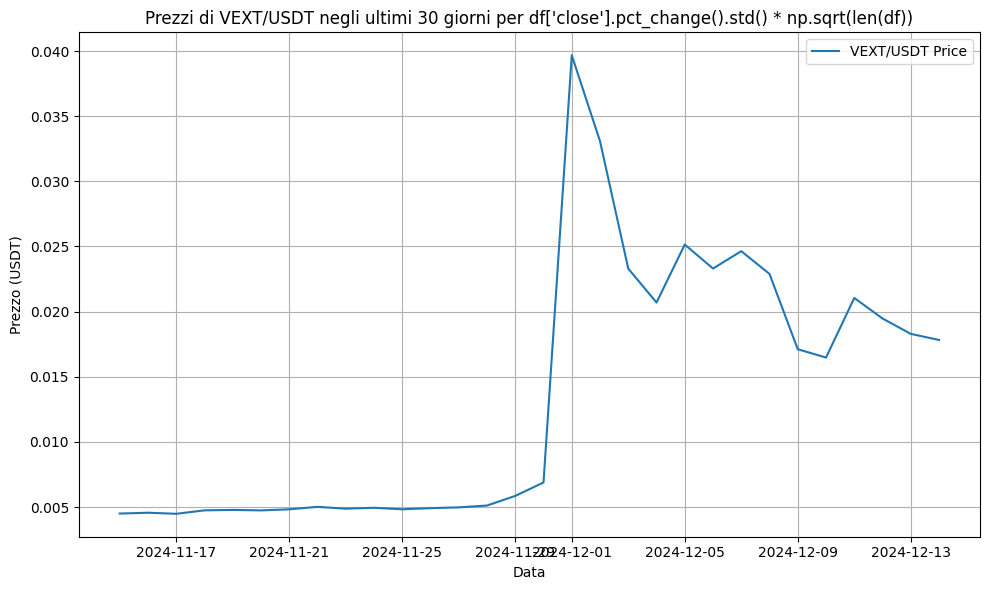

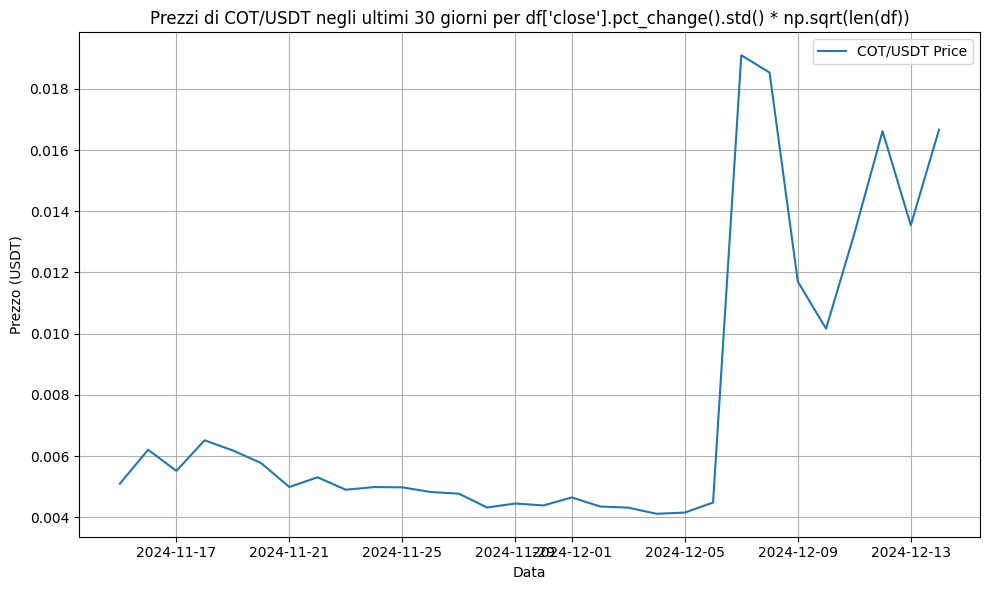

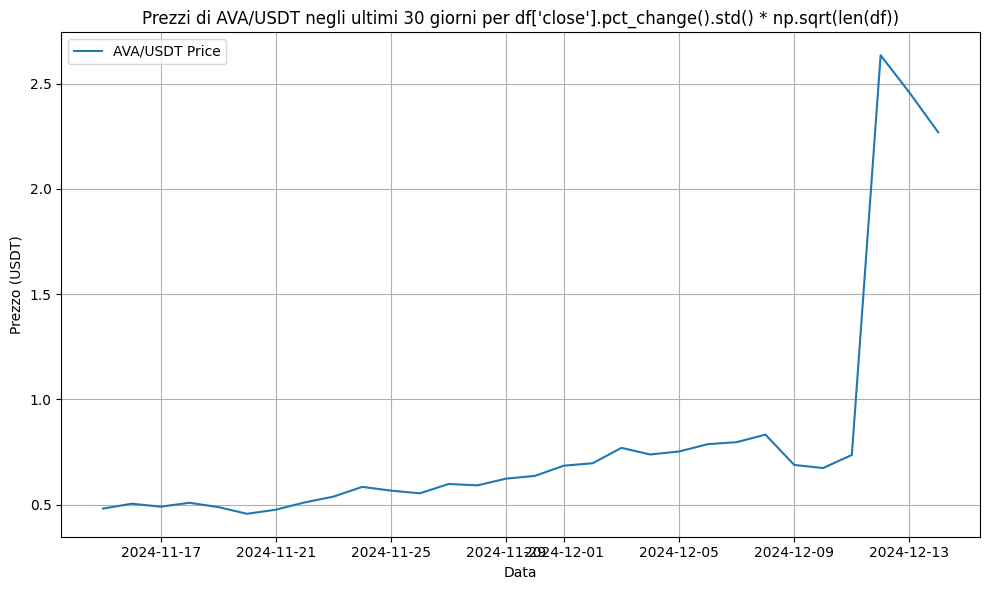


Grafici delle ultime 3 crypto per la metrica df['close'].pct_change().std() * np.sqrt(len(df))


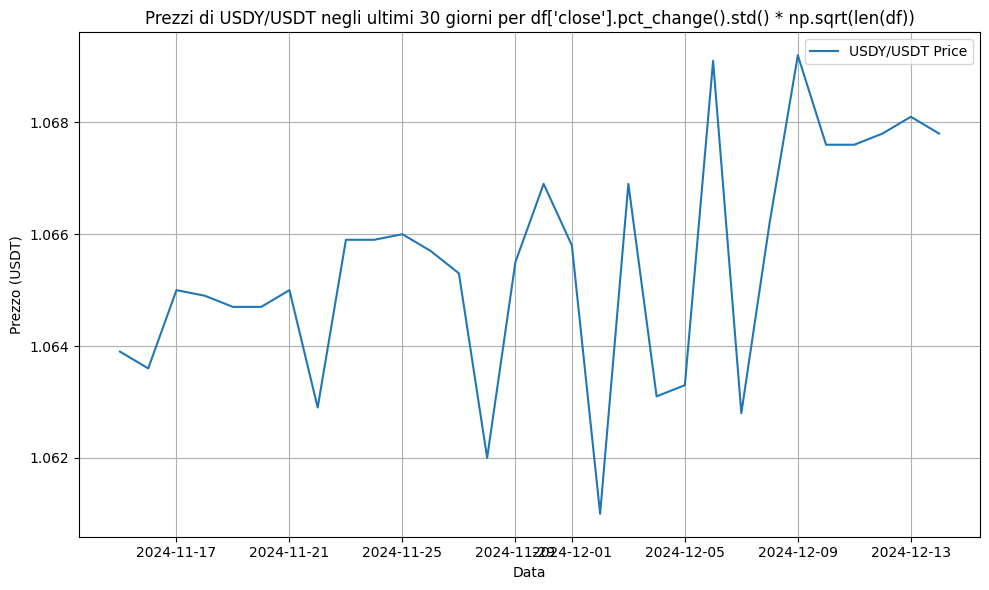

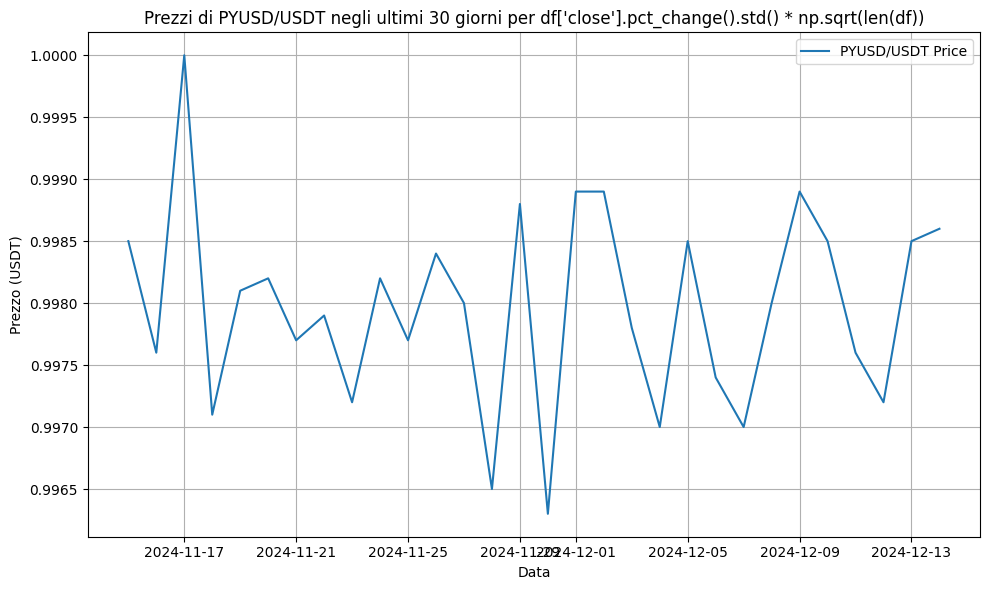

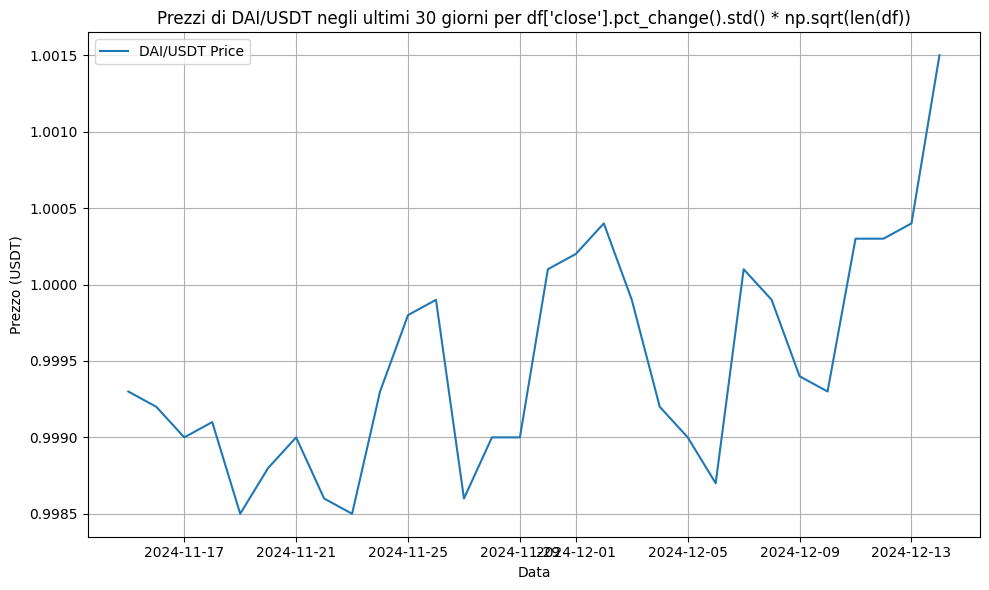


Classifica per la metrica df['close'].pct_change().abs().mean()
Classifica delle top 5 crypto per df['close'].pct_change().abs().mean():
1. SEND/USDT: Valore = 0.2818
2. VEXT/USDT: Valore = 0.2441
3. SUPRA/USDT: Valore = 0.2151
4. COT/USDT: Valore = 0.2128
5. OL/USDT: Valore = 0.2047

Classifica delle bottom 5 crypto per df['close'].pct_change().abs().mean():
1. TUSD/USDT: Valore = 0.0016
2. PYUSD/USDT: Valore = 0.0010
3. DAI/USDT: Valore = 0.0004
4. USDC/USDT: Valore = 0.0004
5. USDE/USDT: Valore = 0.0003

Grafici delle prime 3 crypto per la metrica df['close'].pct_change().abs().mean()


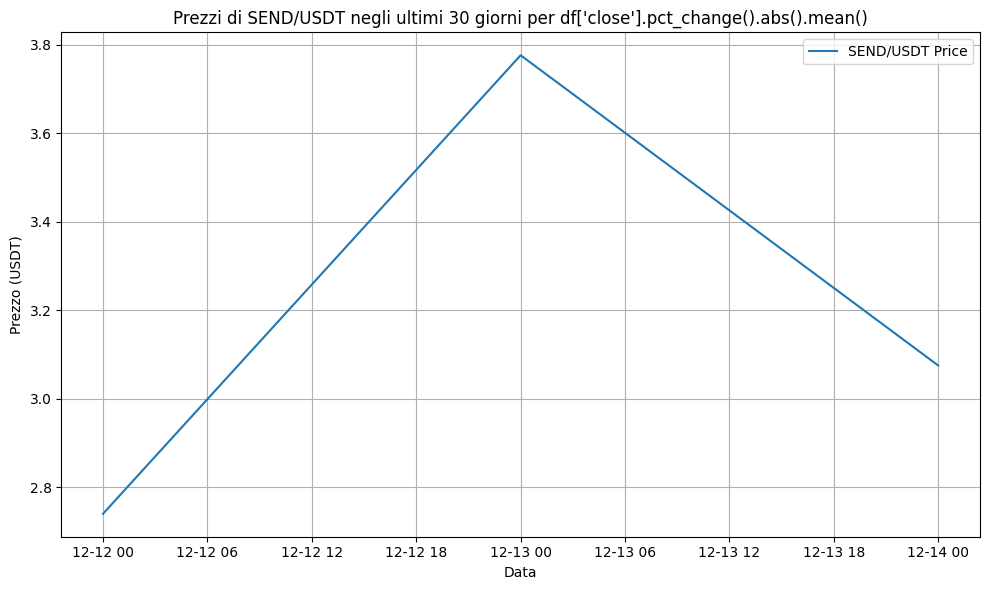

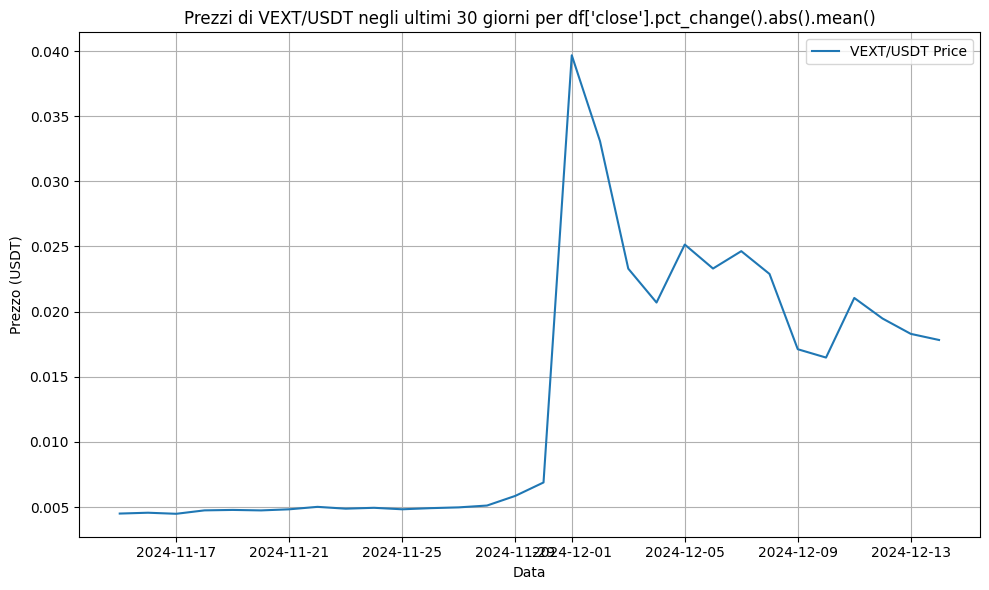

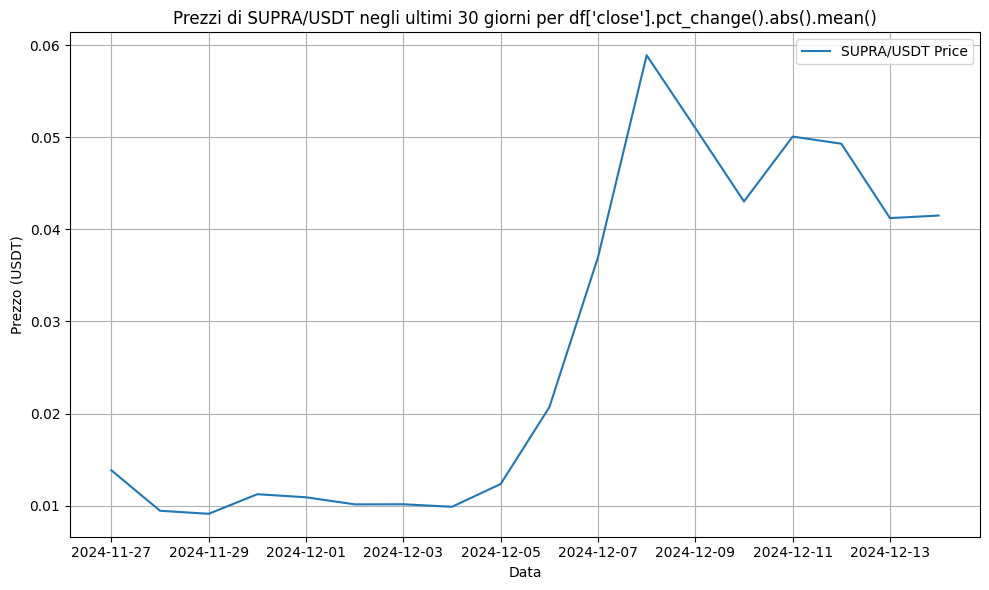


Grafici delle ultime 3 crypto per la metrica df['close'].pct_change().abs().mean()


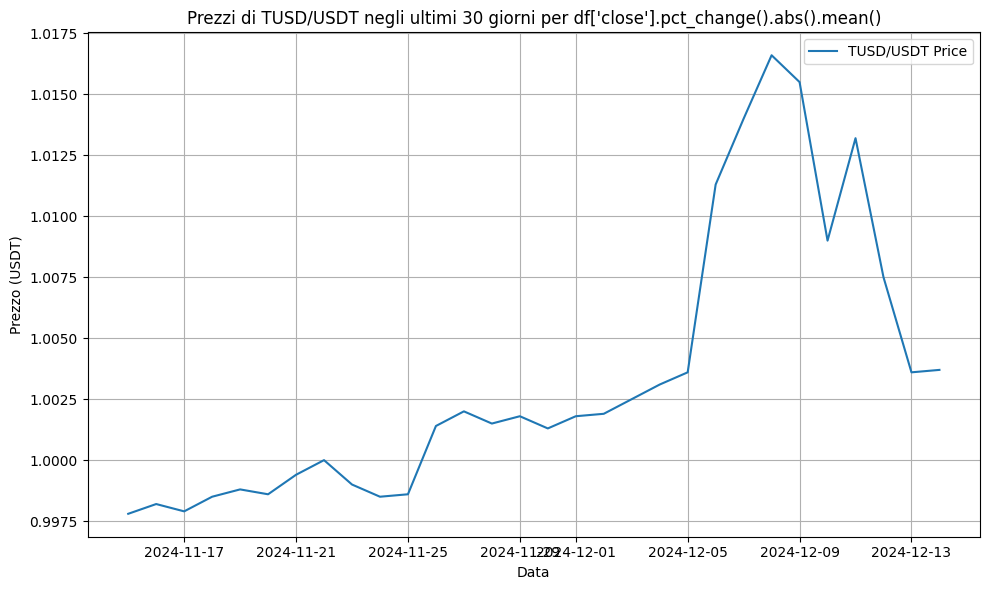

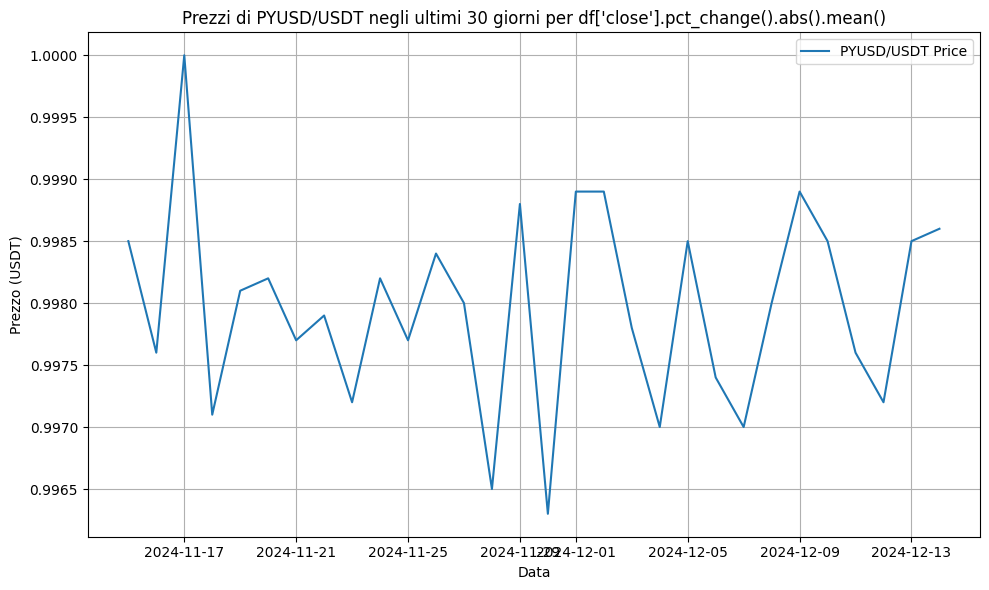

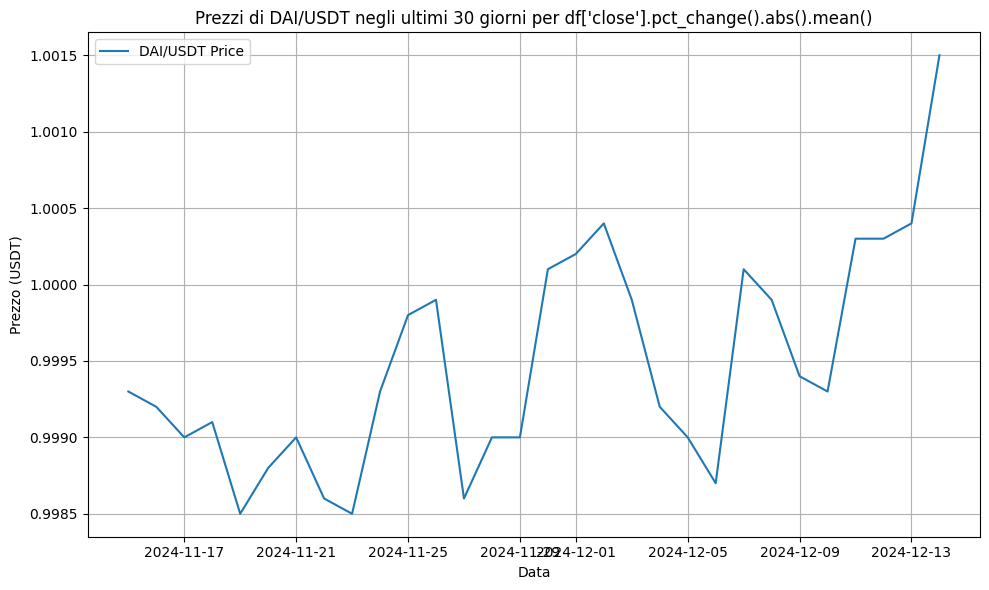

In [3]:
# Esempio di utilizzo
market_name = "bybit" # Specifica l'exchange da cui scaricare i dati
timeframe_download = '1d' # Timeframe giornaliero
days_period = 30 # Periodo di L giorni
top_n_cryptos = 5 # Numero di crypto da classificare
metrics_list = [
    "df['close'].pct_change().std() * np.sqrt(len(df))", # Volatilità annualizzata
    "df['close'].pct_change().abs().mean()" # Media dei valori assoluti delle variazioni percentuali tra un dato e il successivo
]
crypto_metric_ranking(market_name, timeframe_download, days_period, top_n_cryptos, metrics_list, plot=True)